/tmp/ipython-input-1-4025468533.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df1 = yf.download(ticker_1, start=start_date, end=end_date)[['Close']]
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-4025468533.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df2 = yf.download(ticker_2, start=start_date, end=end_date)[['Close']]
[*********************100%***********************]  1 of 1 completed


              HDFCBANK   ICICIBANK
Date                              
2015-01-01  435.551880  296.292603
2015-01-02  441.613617  304.702789
2015-01-05  437.885040  305.333527
2015-01-06  431.068512  292.381775
2015-01-07  432.326630  284.476257


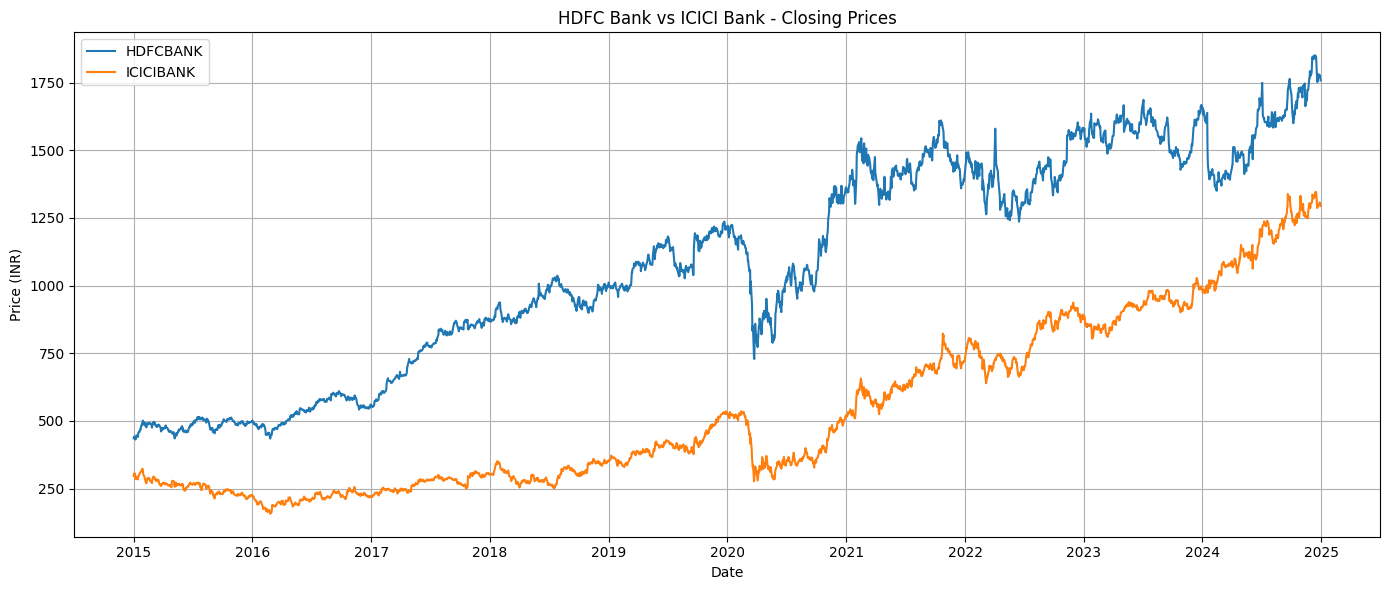

✅ Data saved to: hdfc_icici_pair_data.csv


In [ ]:
 # Install yfinance (only once)
!pip install yfinance --upgrade

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Set Tickers and Date Range
ticker_1 = 'HDFCBANK.NS'
ticker_2 = 'ICICIBANK.NS'
start_date = '2015-01-01'
end_date = '2024-12-31'

# : Download Daily Close Prices
df1 = yf.download(ticker_1, start=start_date, end=end_date)[['Close']]
df2 = yf.download(ticker_2, start=start_date, end=end_date)[['Close']]

# : Rename and Merge DataFrames
df1.columns = ['HDFCBANK']
df2.columns = ['ICICIBANK']
df = pd.merge(df1, df2, left_index=True, right_index=True).dropna()

# : Display Data
print(df.head())

# : Plot Closing Prices
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['HDFCBANK'], label='HDFCBANK')
plt.plot(df.index, df['ICICIBANK'], label='ICICIBANK')
plt.title('HDFC Bank vs ICICI Bank - Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# : Merge and clean
df = pd.merge(df1, df2, left_index=True, right_index=True).dropna()

# : Save as CSV in Colab or local environment
csv_path = "hdfc_icici_pair_data.csv"
df.to_csv(csv_path)

print(f"✅ Data saved to: {csv_path}")

In [ ]:
from google.colab import files
files.download(csv_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import yfinance as yf
import pandas as pd

# Download from Yahoo Finance
df1 = yf.download('HDFCBANK.NS', start='2015-01-01', end='2024-12-31')[['Close']].rename(columns={'Close': 'HDFCBANK'})
df2 = yf.download('ICICIBANK.NS', start='2015-01-01', end='2024-12-31')[['Close']].rename(columns={'Close': 'ICICIBANK'})

# Merge data
df = pd.merge(df1, df2, left_index=True, right_index=True).dropna()

# Strip whitespace from column names safely
df.columns = [str(col).strip() for col in df.columns]

# Preview
df.head()



/tmp/ipython-input-22-425155937.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df1 = yf.download('HDFCBANK.NS', start='2015-01-01', end='2024-12-31')[['Close']].rename(columns={'Close': 'HDFCBANK'})
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-22-425155937.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df2 = yf.download('ICICIBANK.NS', start='2015-01-01', end='2024-12-31')[['Close']].rename(columns={'Close': 'ICICIBANK'})
[*********************100%***********************]  1 of 1 completed


,"('HDFCBANK', 'HDFCBANK.NS')","('ICICIBANK', 'ICICIBANK.NS')"
Date,,
2015-01-01,435.551880,296.292603
2015-01-02,441.613617,304.702789
2015-01-05,437.885040,305.333527
2015-01-06,431.068512,292.381775
2015-01-07,432.326630,284.476257


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


✅ Data loaded successfully:
              HDFCBANK   ICICIBANK
Date                              
2015-01-01  435.551849  296.292542
2015-01-02  441.613617  304.702789
2015-01-05  437.885071  305.333557
2015-01-06  431.068512  292.381836
2015-01-07  432.326599  284.476196


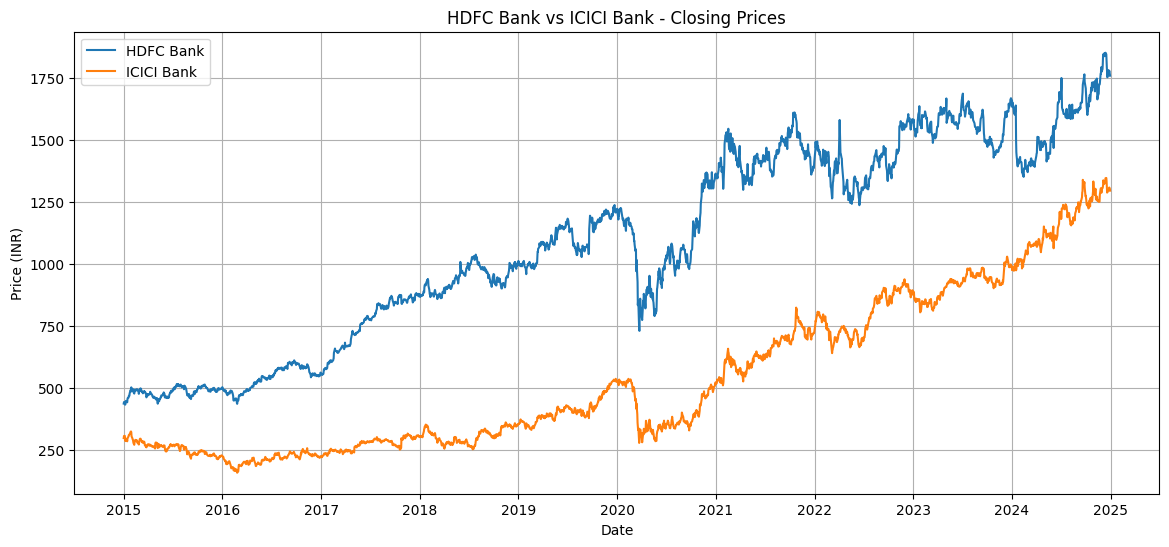

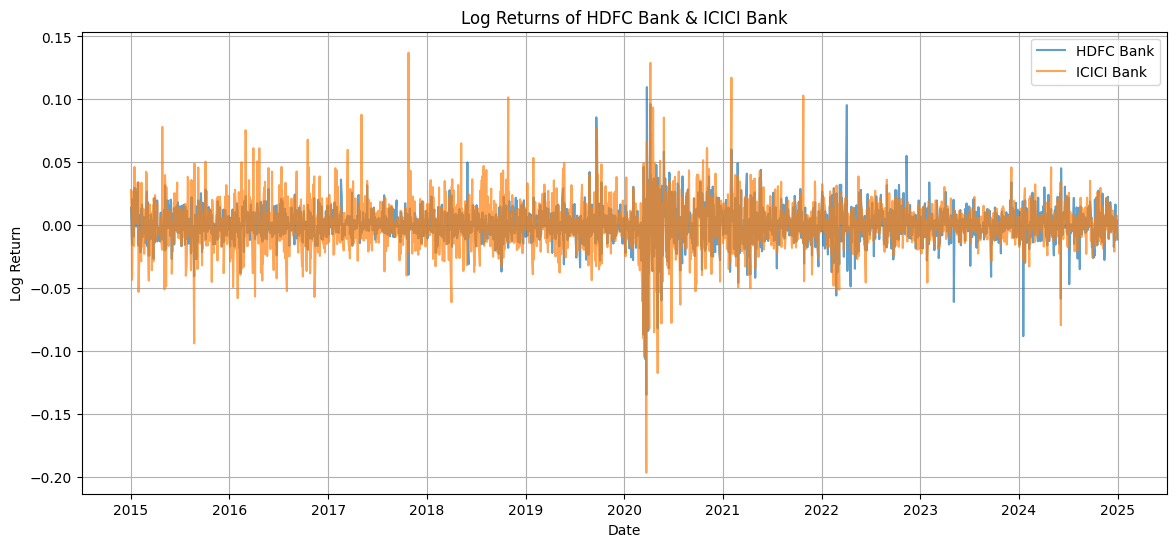

🔗 Correlation between log returns: 0.5167


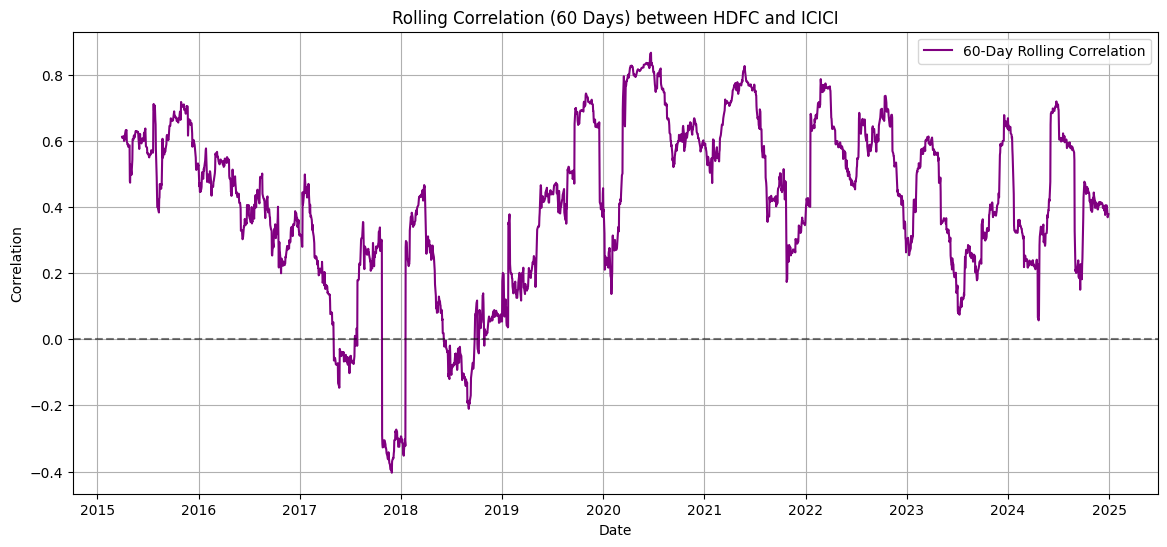

In [6]:
# : Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

file_path = '/content/drive/My Drive/hdfc_icici_pair_data.csv'  # Update path if stored in a subfolder

df = pd.read_csv(file_path, index_col=0, parse_dates=True)
df.columns = df.columns.str.strip()

print(" Data loaded successfully:")
print(df.head())


# : Plot closing prices
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['HDFCBANK'], label='HDFC Bank')
plt.plot(df.index, df['ICICIBANK'], label='ICICI Bank')
plt.title("HDFC Bank vs ICICI Bank - Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

# : Compute log returns
log_returns = np.log(df / df.shift(1)).dropna()

# : Plot log returns
plt.figure(figsize=(14,6))
plt.plot(log_returns.index, log_returns['HDFCBANK'], label='HDFC Bank', alpha=0.7)
plt.plot(log_returns.index, log_returns['ICICIBANK'], label='ICICI Bank', alpha=0.7)
plt.title("Log Returns of HDFC Bank & ICICI Bank")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.show()

# : Static correlation
correlation = log_returns['HDFCBANK'].corr(log_returns['ICICIBANK'])
print(f"🔗 Correlation between log returns: {correlation:.4f}")

# : Rolling correlation (60-day)
rolling_corr = log_returns['HDFCBANK'].rolling(window=60).corr(log_returns['ICICIBANK'])

plt.figure(figsize=(14,6))
plt.plot(rolling_corr.index, rolling_corr, label='60-Day Rolling Correlation', color='purple')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title("Rolling Correlation (60 Days) between HDFC and ICICI")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.grid(True)
plt.show()



🧮 Hedge Ratio (Beta): 1.1294

🔍 Augmented Dickey-Fuller Test on Spread:
ADF Statistic: -1.8753
p-value: 0.3438
❌ The spread is likely not stationary.


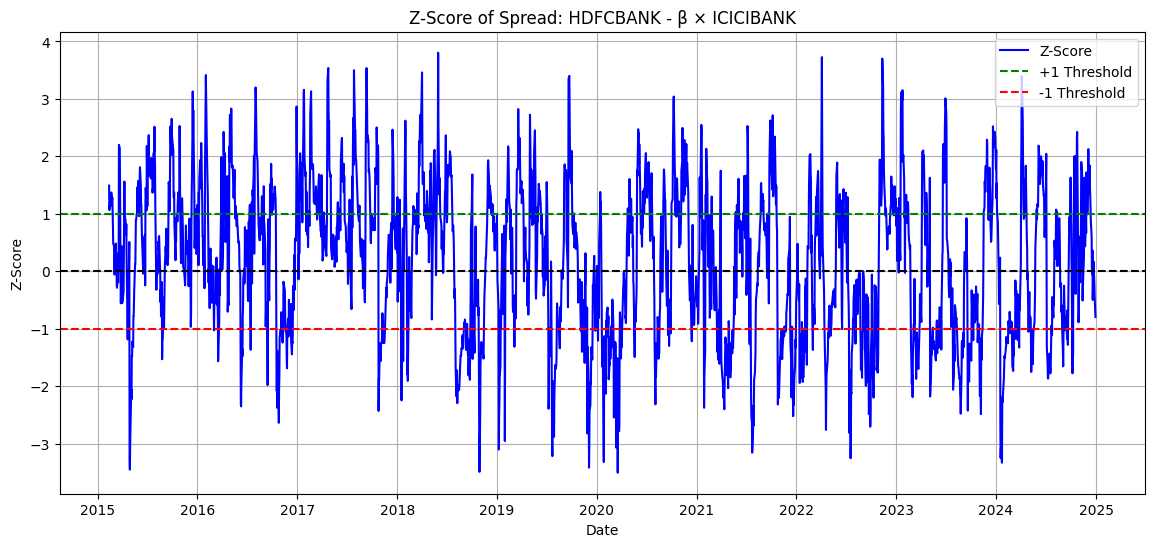

In [ ]:
# : Import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# : Run OLS regression to estimate hedge ratio (HDFCBANK ~ ICICIBANK)
y = df['HDFCBANK']
x = df['ICICIBANK']
x = sm.add_constant(x)  # add intercept
model = sm.OLS(y, x).fit()
hedge_ratio = model.params['ICICIBANK']
print(f"Hedge Ratio (Beta): {hedge_ratio:.4f}")

# : Calculate spread
df['Spread'] = df['HDFCBANK'] - hedge_ratio * df['ICICIBANK']

# : Augmented Dickey-Fuller test on spread (for stationarity)
adf_result = adfuller(df['Spread'])
print("\n🔍 Augmented Dickey-Fuller Test on Spread:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
if adf_result[1] < 0.05:
    print("✅ The spread is likely stationary (mean-reverting).")
else:
    print("❌ The spread is likely not stationary.")

# : Compute Z-score of the spread
window = 30  # rolling window
mean = df['Spread'].rolling(window=window).mean()
std = df['Spread'].rolling(window=window).std()
df['ZScore'] = (df['Spread'] - mean) / std

# : Plot Z-score with entry/exit thresholds
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df.index, df['ZScore'], label='Z-Score', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='green', linestyle='--', label='+1 Threshold')
plt.axhline(-1, color='red', linestyle='--', label='-1 Threshold')
plt.title('Z-Score of Spread: HDFCBANK - β × ICICIBANK')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Feature Engineering
df['ZScore_Lag1'] = df['ZScore'].shift(1)
df['Spread_Change'] = df['Spread'] - df['Spread'].shift(1)
df['Rolling_Mean_Spread'] = df['Spread'].rolling(window=5).mean()
df['Rolling_Std_Spread'] = df['Spread'].rolling(window=5).std()

# Volatility of prices (rolling std of log returns)
returns_hdfc = np.log(df['HDFCBANK'] / df['HDFCBANK'].shift(1))
returns_icici = np.log(df['ICICIBANK'] / df['ICICIBANK'].shift(1))

df['Volatility_HDFC'] = returns_hdfc.rolling(window=10).std()
df['Volatility_ICICI'] = returns_icici.rolling(window=10).std()

# Target Label (Rule-Based)
# Buy when Z-Score < -1, Sell when > 1, else Hold
def generate_signal(z):
    if z < -1:
        return 1   # Buy Signal
    elif z > 1:
        return -1  # Sell Signal
    else:
        return 0   # Hold

df['Signal'] = df['ZScore'].apply(generate_signal)

#  Drop rows with NaNs (from lagging/rolling)
df.dropna(inplace=True)

#  Check result
print("🔍 Engineered Features and Signal Labels:")
print(df[['ZScore', 'ZScore_Lag1', 'Spread_Change', 'Volatility_HDFC', 'Volatility_ICICI', 'Signal']].head())


🔍 Engineered Features and Signal Labels:
              ZScore  ZScore_Lag1  Spread_Change  Volatility_HDFC  \
Date                                                                
2015-03-02  0.436182     0.487412      -0.046801         0.012687   
2015-03-03  0.420624     0.436182       0.745930         0.012690   
2015-03-04 -0.057443     0.420624      -8.922657         0.013741   
2015-03-05  0.412463    -0.057443      10.578107         0.014991   
2015-03-09  0.482671     0.412463       2.259941         0.016869   

            Volatility_ICICI  Signal  
Date                                  
2015-03-02          0.022990       0  
2015-03-03          0.022101       0  
2015-03-04          0.021837       0  
2015-03-05          0.021482       0  
2015-03-09          0.025028       0  


🎯 Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.81      0.84       123
           0       0.79      0.90      0.84       218
           1       0.93      0.79      0.85       145

    accuracy                           0.85       486
   macro avg       0.87      0.83      0.85       486
weighted avg       0.85      0.85      0.85       486

✅ Accuracy: 0.845679012345679


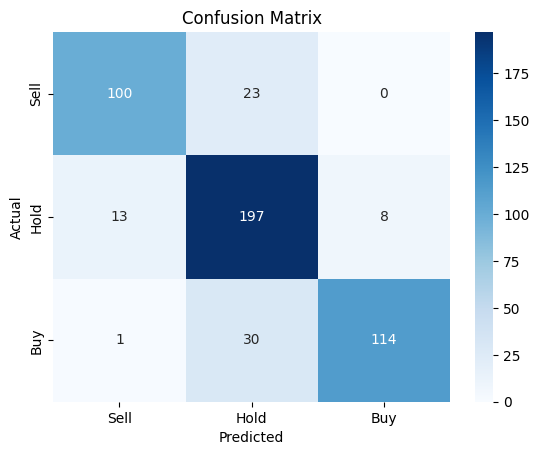

In [ ]:
# ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#  Define features and target
features = [
    'ZScore_Lag1',
    'Spread_Change',
    'Rolling_Mean_Spread',
    'Rolling_Std_Spread',
    'Volatility_HDFC',
    'Volatility_ICICI'
]
X = df[features]
y = df['Signal']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # no shuffle for time series
)

# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

#  Predict on test set
y_pred = model.predict(X_test)

#  Evaluation
print("🎯 Classification Report:")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sell', 'Hold', 'Buy'], yticklabels=['Sell', 'Hold', 'Buy'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


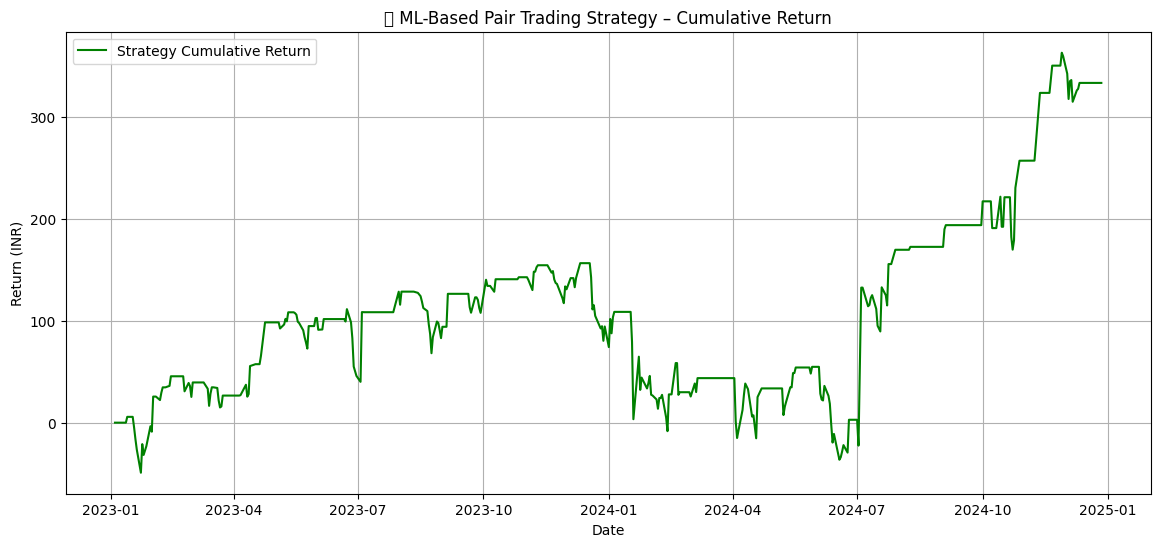

In [ ]:
# Step 1: Create a copy of test set for simulation
df_bt = df.loc[X_test.index].copy()
df_bt['Predicted_Signal'] = y_pred

# Step 2: Calculate next-day spread return
df_bt['Next_Spread'] = df_bt['Spread'].shift(-1)
df_bt['Spread_Return'] = df_bt['Next_Spread'] - df_bt['Spread']

# Step 3: Calculate strategy returns based on signal
# Long spread (Buy HDFC, Sell ICICI) if Predicted = +1
# Short spread (Sell HDFC, Buy ICICI) if Predicted = -1
df_bt['Strategy_Return'] = df_bt['Predicted_Signal'] * df_bt['Spread_Return']

# Step 4: Cumulative return
df_bt['Cumulative_Return'] = df_bt['Strategy_Return'].cumsum()

# Step 5: Plot equity curve
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(df_bt.index, df_bt['Cumulative_Return'], label='Strategy Cumulative Return', color='green')
plt.title("📈 ML-Based Pair Trading Strategy – Cumulative Return")
plt.xlabel("Date")
plt.ylabel("Return (INR)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Sharpe Ratio
mean_return = df_bt['Strategy_Return'].mean()
std_return = df_bt['Strategy_Return'].std()
sharpe_ratio = (mean_return / std_return) * np.sqrt(252)

print(f"⚖️ Sharpe Ratio: {sharpe_ratio:.2f}")


⚖️ Sharpe Ratio: 0.83
